In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('modeling_properties.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        890 non-null    object 
 1   postal_code  890 non-null    int64  
 2   beds         890 non-null    float64
 3   baths        890 non-null    float64
 4   sq_feet      890 non-null    float64
 5   price        890 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 41.8+ KB


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y=np.log(y) #Since the distribution its not normal, and log distribution it is, we'll use log for a better fit, we'll have to remember to transform this for the predictions

In [5]:
import category_encoders as ce
ct =  ce.BinaryEncoder(cols=0,return_df=False);#Encoding titles #calar despues con one hot tambien a ver qp
X= ct.fit_transform(X)

ct =  ce.BinaryEncoder(cols=4,return_df=False);#Encoding postal_codes #calar despues con one hot tambien a ver qp
X= ct.fit_transform(X)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
#This regressor is not much of a improvement to the original, 1-2%. But i'll use it for the sake of the project and explanation. Normally I'd use the other model since its almost the same
regressor = RandomForestRegressor(n_estimators = 300, min_samples_split=5, min_samples_leaf=1,max_features='sqrt',max_depth=60, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=5, n_estimators=300)

In [7]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[14.40597124 14.6016926 ]
 [13.92277186 13.90991123]
 [14.14002664 14.11487414]
 [14.01563493 13.81049802]
 [14.25239078 14.03865411]
 [13.77468856 13.77468856]
 [13.31321222 12.76568843]
 [14.31731233 13.91082074]
 [13.59202063 13.52649426]
 [14.40296789 14.3431933 ]
 [14.39244578 14.68889379]
 [13.54839172 13.53975706]
 [13.50177058 13.70903831]
 [14.66561422 14.14840497]
 [13.77536396 13.79428692]
 [15.14482434 15.00639812]
 [13.93807568 14.03785379]
 [13.76297291 13.76316408]
 [13.53822126 13.44154412]
 [13.82678168 13.58609739]
 [14.4547294  14.4547294 ]
 [13.99651657 13.9090009 ]
 [13.49781551 13.62313867]
 [14.28122096 14.18707411]
 [14.69354068 15.11706369]
 [14.27053177 14.14840497]
 [14.62868682 14.5574479 ]
 [13.45740602 13.45740602]
 [14.14777743 14.25376549]
 [13.87413066 13.86430072]
 [14.29247285 14.11487414]
 [13.90336932 13.99365674]
 [15.35448425 15.88868249]
 [13.38835411 13.11231304]
 [15.5324966  15.65606019]
 [13.30301688 13.30301688]
 [13.45883561 13.45883561]
 

Lets take a look at it with the normal values

In [11]:
y_pred_normal=np.exp(y_pred)
y_test_normal=np.exp(y_test)
print(np.concatenate((y_pred_normal.reshape(len(y_pred_normal),1), y_test_normal.reshape(len(y_test_normal),1)),1))


[[ 1804819.66364654  2195000.        ]
 [ 1113225.10163819  1099000.        ]
 [ 1383361.05650255  1349000.        ]
 [ 1221554.67152111   995000.        ]
 [ 1547870.65952143  1250000.        ]
 [  960000.00000008   960000.        ]
 [  605138.24830186   350000.        ]
 [ 1651694.56854679  1100000.        ]
 [  799722.94688086   749000.        ]
 [ 1799407.29412022  1695000.        ]
 [ 1780573.00656059  2395000.        ]
 [  765582.08404123   759000.        ]
 [  730709.00336083   899000.        ]
 [ 2339889.38608578  1395000.        ]
 [  960648.60379343   979000.        ]
 [ 3778449.67028538  3290000.        ]
 [ 1130392.73306744  1249000.        ]
 [  948818.60243635   949000.        ]
 [  757835.22357313   688000.        ]
 [ 1011334.87684079   795000.        ]
 [ 1895000.00000011  1895000.        ]
 [ 1198422.38587201  1098000.        ]
 [  727824.70581405   825000.        ]
 [ 1593145.55295249  1450000.        ]
 [ 2406155.20870719  3675000.        ]
 [ 1576206.81097375  1395

In [12]:
# Evaluating the Model Performance
from sklearn.metrics import mean_absolute_error, r2_score
r2=r2_score(y_test, y_pred)
n=len(y_test)
p=len(X[0])
r2_adj=1-(1-r2)*(n-1)/(n-p-1)
print('R squared: ', r2)
print('Adjsuted R squared: ', r2_adj)
print('MAE: ', mean_absolute_error(np.exp(y_test), np.exp(y_pred)))


R squared:  0.8510359364710256
Adjsuted R squared:  0.8392278094839727
MAE:  482827.6121240888


In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(regressor, X, y, cv=7, scoring='r2').mean())
print(cross_val_score(regressor, X, y, cv=7, scoring='explained_variance').mean())

0.7529520011402356
0.7579079707842228


In [15]:
#Predicting an arbitrary value
result = np.exp(regressor.predict([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3.0, 2.0, 800]]))
print('Arbitrary Prediction (0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3.0, 2.0, 800): ', result)


Arbitrary Prediction (0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3.0, 2.0, 800):  [999226.26172544]


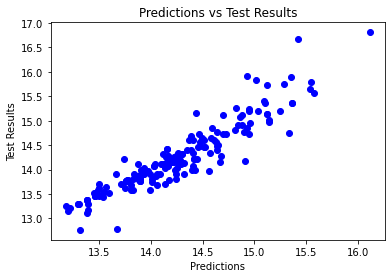

In [16]:
plt.scatter(y_pred, y_test, color = 'blue')
plt.title('Predictions vs Test Results')
plt.xlabel('Predictions')
plt.ylabel('Test Results')
plt.show()